In [1]:
using MagneticLaplacianSparsifier
using Graphs, MetaGraphs, Random, IterTools, LinearAlgebra, GraphPlot, Arpack, Plots, SparseArrays
using Statistics
using Measures
using GraphIO 
using ParserCombinator 

#### Political blogs


In [2]:
real_g = "polblogs.gml"
g = loadgraph(real_g, "digraph", GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

{1490, 16718} undirected simple Int64 graph

In [3]:
rng = Random.default_rng()
meta_g = MetaGraph(g)
for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.001
n_tot = 6
n_rep = 1

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)

Dict{Any, Any} with 4 entries:
  "DPP unif" => Dict("sp_L"=>[14266.0; 152420.0; … ; 250470.0; 265437.0], "sp_L…
  "iid LS"   => Dict("sp_L"=>[55092.0; 149781.0; … ; 261047.0; 274672.0], "sp_L…
  "iid unif" => Dict("sp_L"=>[50172.0; 115057.0; … ; 206509.0; 227786.0], "sp_L…
  "DPP LS"   => Dict("sp_L"=>[12324.0; 139892.0; … ; 251447.0; 261083.0], "sp_L…

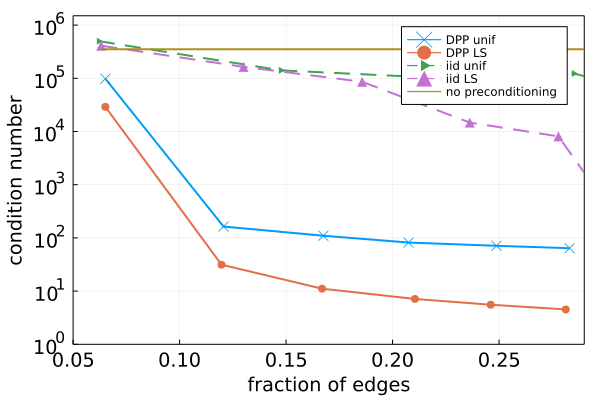

In [5]:
method = "DPP unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot(x,y,yerror=y_er,
xlabel = "fraction of edges",
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:xcross,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "DPP LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:circle,
markersize = 5,
linewidth=2,
markerstrokewidth=2)

method = "iid unif"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:rtriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

method = "iid LS"
D = D_all[method]

x = D["percent_edges"]
y = D["cnd"]
y_er = D["cnd_std"]
plot!(x,y,yerror=y_er,
yaxis=:log,
labels = method,
markerstrokecolor=:auto,
markershape=:utriangle,
markersize = 5,
linestyle=:dash,
linewidth=2,
markerstrokewidth=2)

x = D["percent_edges"]
y = cond(L + q * I)*ones(n_tot,1)
plot!(x,y,
labels = "no preconditioning",
ylabel = "condition number",
xtickfontsize=13,
ytickfontsize=13,
xguidefontsize=13,
yguidefontsize=13,
legendfontsize=10,
framestyle = :box,
linewidth=2,
markerstrokewidth=2,
margins = 0.1*2Plots.cm)

ylims!((1e0,1.5*1e6))
xlims!((0.05,0.29))
yticks!([1,1e1,1e2,1e3,1e4,1e5,1e6])

# foldername = "figures/"
# type = "precond_"
# name = type*real_g*string(q)*".pdf"
# savefig(foldername*name)

#### Books about US politics


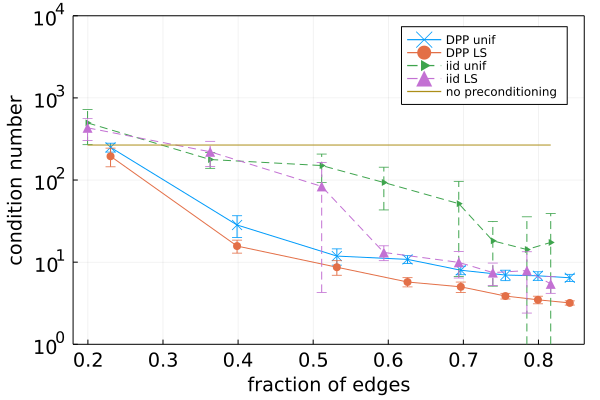

In [13]:
real_g = "polbooks.gml"

g = loadgraph(real_g, GraphIO.GML.GMLFormat())
g = SimpleGraph(g)

rng = Random.default_rng()

meta_g = MetaGraph(g)

for e in edges(meta_g)
    set_prop!(meta_g, e, :angle, 0.0)
end

B = magnetic_incidence(meta_g)
L = B * B'

q = 0.1
n_tot = 8
n_rep = 10

D_all = cond_numbers(meta_g,q,n_tot,n_rep,rng)



In [19]:
foldername = "figures/"
type = "precond_"
name = type*real_g*string(q)*".pdf"
savefig(foldername*name)
